In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vae_interp.vae import VAE
from vae_interp.sae import SAE
from vae_interp.controls import FeaturesControls
from vae_interp.dataset import load_nouns_dataset, NpyDataset
import matplotlib.pyplot as plt

/home/ubuntu/.cache/pypoetry/virtualenvs/nouns-mech-interp-YeAXWnnL-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
vae = VAE.load_from_dir("./checkpoints/vae")
sae = SAE.load_from_checkpoint("./checkpoints/sae_experiments/lr=5.0e-04_l1=5.0e-03/sae_config.json",
                               "./checkpoints/sae_experiments/lr=5.0e-04_l1=5.0e-03/sae.pth")

In [4]:
nouns_dataset = load_nouns_dataset(image_size=64, normalize=True)

In [5]:
features_controls = FeaturesControls(
    sae=sae, vae=vae, latent_shape=(4, 4, 4)
)

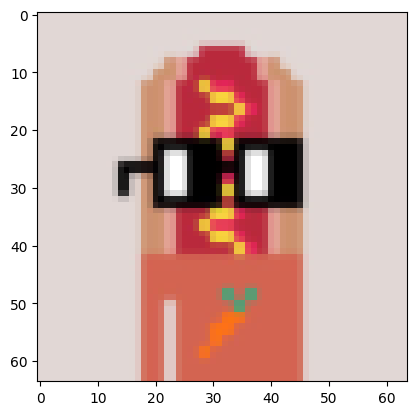

In [6]:
idx = 0
image = nouns_dataset[idx]

plt.imshow((image.permute(1, 2, 0) + 1) * 0.5)

In [7]:
features = features_controls.get_features(image)
features

{124: 0.023699700832366943,
 155: 0.1298753023147583,
 168: 0.07241836190223694,
 173: 0.1903119683265686,
 183: 0.04088084399700165,
 202: 2.722918748855591,
 220: 0.3788229823112488,
 282: 0.04384241998195648,
 409: 0.022105887532234192}

In [30]:
new_features = {**features}
# new_features[202] = 2
# new_features[1] = 3
new_features[114] = 2
# new_features[497] = 2
# new_features[1] = 2.5
new_features

{124: 0.023699700832366943,
 155: 0.1298753023147583,
 168: 0.07241836190223694,
 173: 0.1903119683265686,
 183: 0.04088084399700165,
 202: 2.722918748855591,
 220: 0.3788229823112488,
 282: 0.04384241998195648,
 409: 0.022105887532234192,
 114: 2}

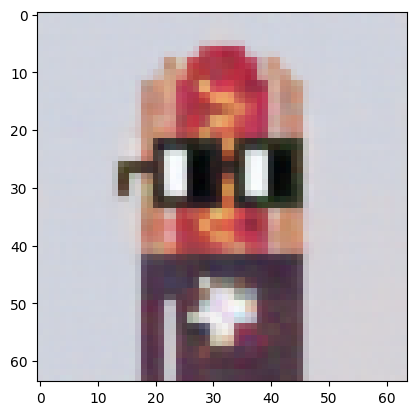

In [31]:
modified_image = features_controls.modify_features(image, new_features)
modified_image = (modified_image - modified_image.min()) / (modified_image.max() - modified_image.min())
modified_image = modified_image.permute(1, 2, 0)

plt.imshow(modified_image)